In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from langdetect import detect

In [5]:
df=pd.read_csv("Anime_dataset_2023_1.csv")

In [6]:
df.head()

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24905 non-null  int64 
 1   anime_id    24905 non-null  int64 
 2   Name        24905 non-null  object
 3   Score       24905 non-null  object
 4   Genres      24905 non-null  object
 5   Synopsis    24905 non-null  object
 6   Type        24905 non-null  object
 7   Episodes    24905 non-null  object
 8   Aired       24905 non-null  object
 9   Status      24905 non-null  object
 10  Studios     24905 non-null  object
 11  Source      24905 non-null  object
 12  Duration    24905 non-null  object
 13  Rating      24905 non-null  object
 14  Rank        24905 non-null  object
 15  Popularity  24905 non-null  int64 
 16  Favorites   24905 non-null  int64 
 17  Members     24905 non-null  int64 
 18  Image URL   24905 non-null  object
dtypes: int64(5), object(14)
memory usage: 3.6+ MB


In [8]:
df.describe()

,Unnamed: 0,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,12452.000000,29776.709014,12265.388356,432.595222,3.710496e+04
std,7189.598563,17976.076290,7187.428393,4353.181647,1.568252e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,6226.000000,10507.000000,6040.000000,0.000000,2.090000e+02
50%,12452.000000,34628.000000,12265.000000,1.000000,1.056000e+03
75%,18678.000000,45240.000000,18491.000000,18.000000,9.326000e+03
max,24904.000000,55735.000000,24723.000000,217606.000000,3.744541e+06


In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [11]:
df.shape

(24905, 18)

In [12]:
df.select_dtypes(include=['int64']).corr()

,anime_id,Popularity,Favorites,Members
anime_id,1.000000,0.510459,-0.054634,-0.091948
Popularity,0.510459,1.000000,-0.163173,-0.363865
Favorites,-0.054634,-0.163173,1.000000,0.773120
Members,-0.091948,-0.363865,0.773120,1.000000


<Axes: >

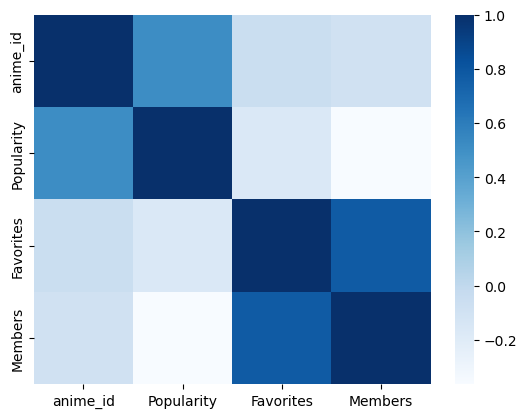

In [13]:
sns.heatmap(df.select_dtypes(include=['int64']).corr(),cmap='Blues')

C:\Users\Sohan Meshram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sohan Meshram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sohan Meshram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sohan Meshram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

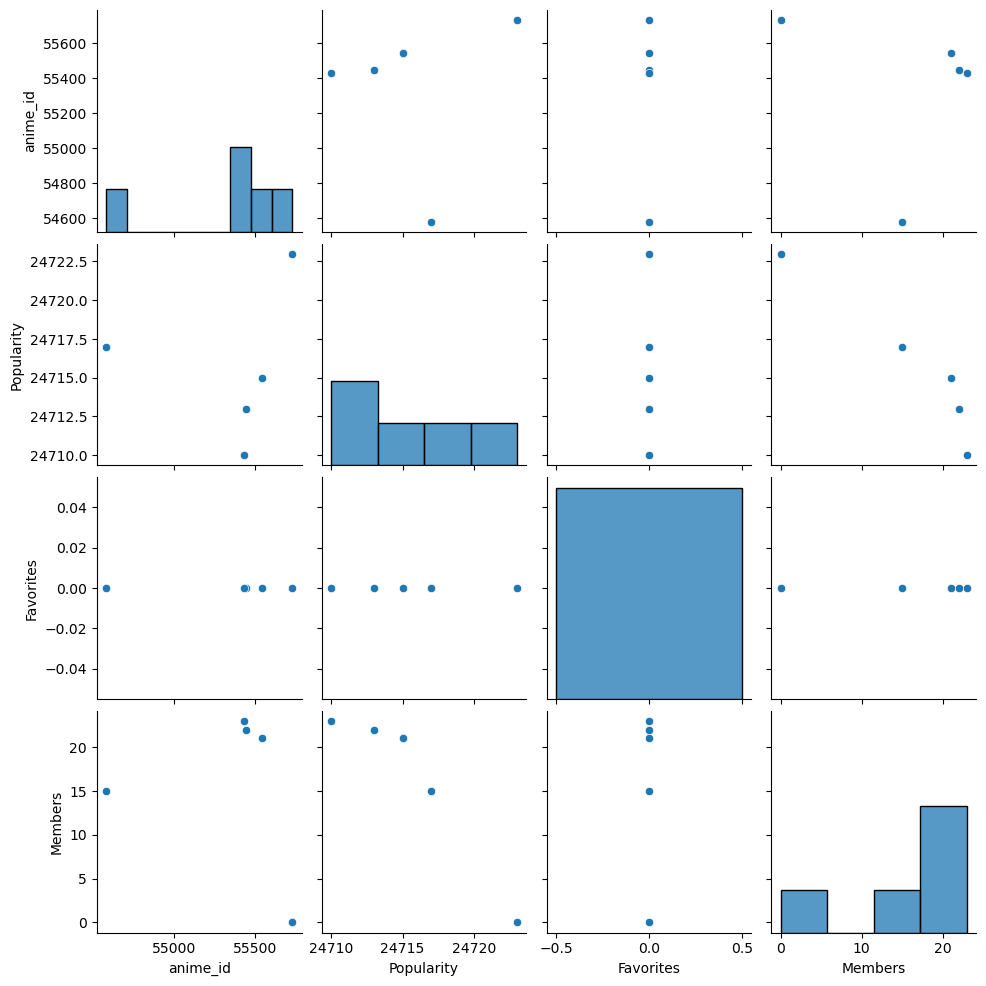

In [14]:
sns.pairplot(df.sort_values(by='Popularity',ascending=False).head())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wu Nao Monu'),
  Text(1, 0, 'Caterpillar'),
  Text(2, 0, 'Ju Ko Kishin Baryon'),
  Text(3, 0, 'Viking'),
  Text(4, 0, 'Namida Time Capsule'),
  Text(5, 0, 'The Grown Dinosaur'),
  Text(6, 0, 'Karma (Music)'),
  Text(7, 0, 'Cult'),
  Text(8, 0, 'Affordance'),
  Text(9, 0, 'Anthracite')])

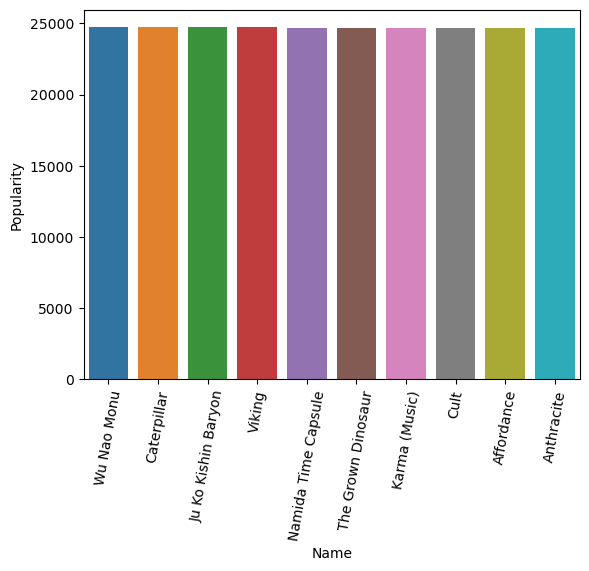

In [15]:
sns.barplot(x='Name',y='Popularity',data=df.sort_values(by='Popularity',ascending=False).head(10))
plt.xticks(rotation=80) 

In [16]:
df.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'Synopsis', 'Type', 'Episodes',
       'Aired', 'Status', 'Studios', 'Source', 'Duration', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Members', 'Image URL'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tsuki no Musume'),
  Text(1, 0, 'Fortune Dogs'),
  Text(2, 0, 'Disney: Twisted-Wonderland'),
  Text(3, 0, 'Suki na Ko ga Megane wo Wasureta'),
  Text(4, 0, 'Sasayaku You ni Koi wo Utau'),
  Text(5, 0, "Dae Jang Geum: Jang Geum's Dream 2"),
  Text(6, 0, 'Kaii to Otome to Kamikakushi'),
  Text(7, 0, 'Chou Futsuu Ken Chiba Densetsu'),
  Text(8, 0, 'Duel Masters Movie 3: Honoo no Kizuna XX'),
  Text(9, 0, 'Nu Sheng Su She Ri Chang Di 2 Ji')])

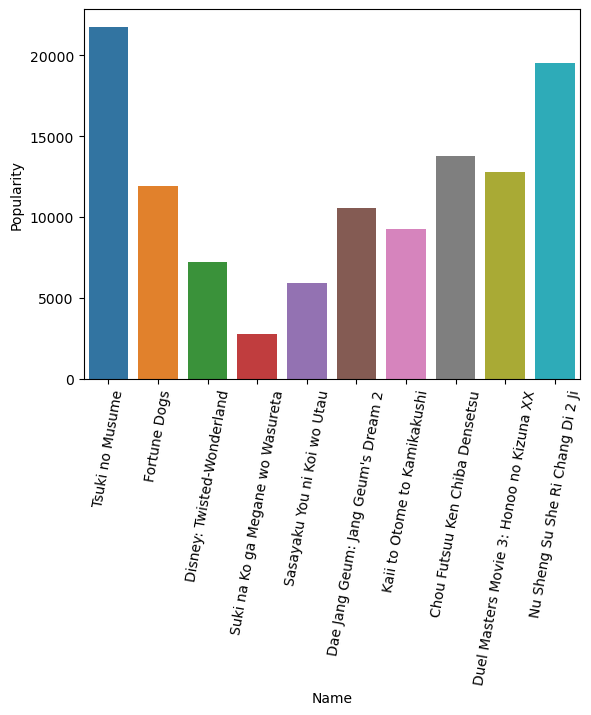

In [17]:
sns.barplot(x='Name',y='Popularity',data=df.sort_values(by='Rating',ascending=False).head(10))
plt.xticks(rotation=80) 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wu Nao Monu'),
  Text(1, 0, 'Caterpillar'),
  Text(2, 0, 'Ju Ko Kishin Baryon'),
  Text(3, 0, 'Viking'),
  Text(4, 0, 'Namida Time Capsule'),
  Text(5, 0, 'The Grown Dinosaur'),
  Text(6, 0, 'Karma (Music)'),
  Text(7, 0, 'Cult'),
  Text(8, 0, 'Affordance'),
  Text(9, 0, 'Anthracite')])

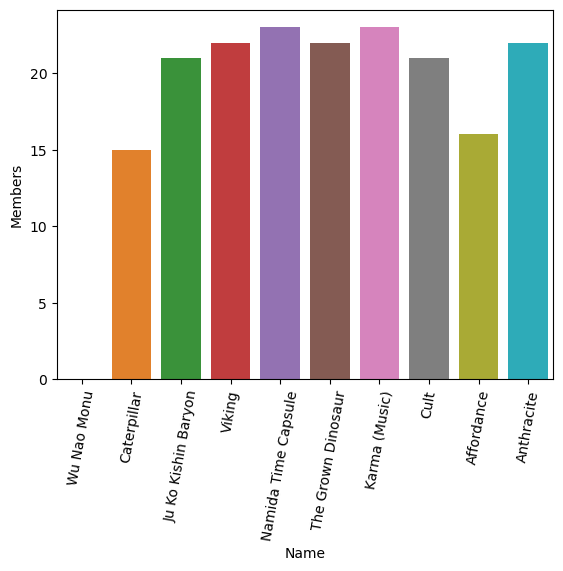

In [18]:
sns.barplot(x='Name',y='Members',data=df.sort_values(by='Popularity',ascending=False).head(10))
plt.xticks(rotation=80) 


In [19]:
df['Type'].value_counts()

Type
TV         7597
Movie      4381
OVA        4076
ONA        3533
Music      2686
Special    2558
UNKNOWN      74
Name: count, dtype: int64

<BarContainer object of 7 artists>

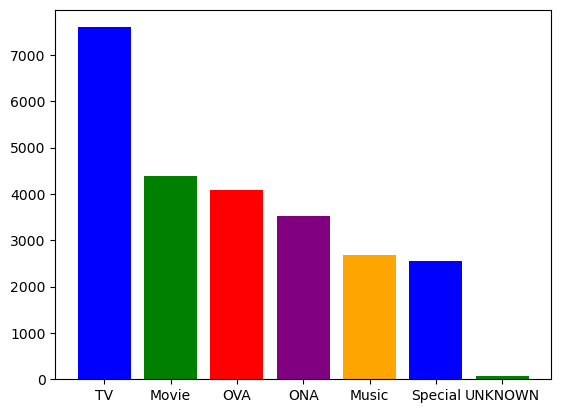

In [20]:
types = df['Type'].value_counts()
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(types.index , types.values,color = colors)

In [21]:
df['Genres'].value_counts()

Genres
UNKNOWN                                          4929
Comedy                                           2279
Fantasy                                          1341
Hentai                                           1181
Drama                                             624
                                                 ... 
Avant Garde, Fantasy, Romance                       1
Action, Comedy, Romance, Supernatural, Hentai       1
Drama, Horror, Supernatural, Ecchi                  1
Adventure, Comedy, Romance, Sports                  1
Action, Adventure, Fantasy, Horror                  1
Name: count, Length: 1006, dtype: int64

In [22]:
df['Genres'].head()

0           Action, Award Winning, Sci-Fi
1                          Action, Sci-Fi
2               Action, Adventure, Sci-Fi
3    Action, Drama, Mystery, Supernatural
4        Adventure, Fantasy, Supernatural
Name: Genres, dtype: object

In [23]:
Genres = df[df['Genres']!="UNKNOWN"]

In [24]:
Genres = df[df['Genres']!="UNKNOWN"]['Genres'].apply(lambda x:x.split(","))

In [25]:
Genres.head()

0            [Action,  Award Winning,  Sci-Fi]
1                            [Action,  Sci-Fi]
2                [Action,  Adventure,  Sci-Fi]
3    [Action,  Drama,  Mystery,  Supernatural]
4         [Adventure,  Fantasy,  Supernatural]
Name: Genres, dtype: object

In [26]:
Genres = df[df['Genres']!="UNKNOWN"]['Genres'].apply(lambda x:x.split(",")).explode()

In [27]:
Genres.head()

0            Action
0     Award Winning
0            Sci-Fi
1            Action
1            Sci-Fi
Name: Genres, dtype: object

In [28]:
Genres = df[df['Genres']!="UNKNOWN"]['Genres'].apply(lambda x:x.split(",")).explode().value_counts()

In [29]:
Genres

Genres
Comedy            5140
Action            4730
 Fantasy          3623
 Sci-Fi           2672
Adventure         2269
 Comedy           2002
 Romance          1756
Fantasy           1683
 Adventure        1573
Drama             1470
 Drama            1366
 Supernatural     1334
Hentai            1181
 Slice of Life    1099
Avant Garde        781
 Ecchi             743
 Mystery           685
Slice of Life      656
Sci-Fi             419
Sports             399
 Sports            372
 Horror            366
Romance            307
 Hentai            305
 Suspense          225
Horror             168
Mystery            162
Supernatural       160
Award Winning      151
Boys Love          146
 Gourmet            95
 Award Winning      90
 Girls Love         86
Ecchi               52
Gourmet             51
 Erotica            47
Girls Love          27
 Boys Love          23
 Avant Garde        23
Suspense            17
Erotica              7
Name: count, dtype: int64

In [30]:
Genres = df[df['Genres']!="UNKNOWN"]['Genres'].apply(lambda x:x.split(",")).explode().value_counts()

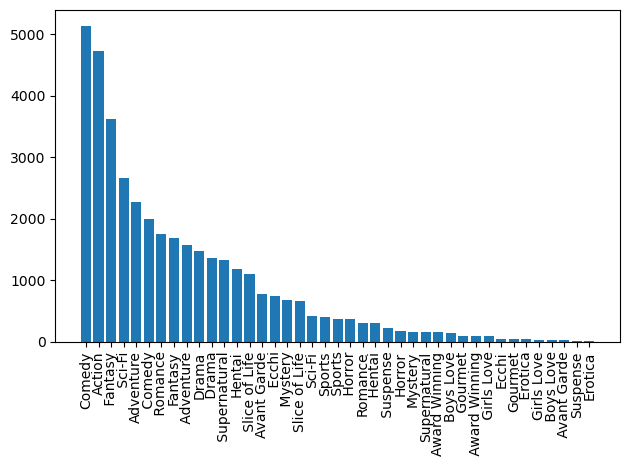

In [31]:
plt.bar(Genres.index , Genres.values)
plt.xticks(rotation=90)
plt.tight_layout()

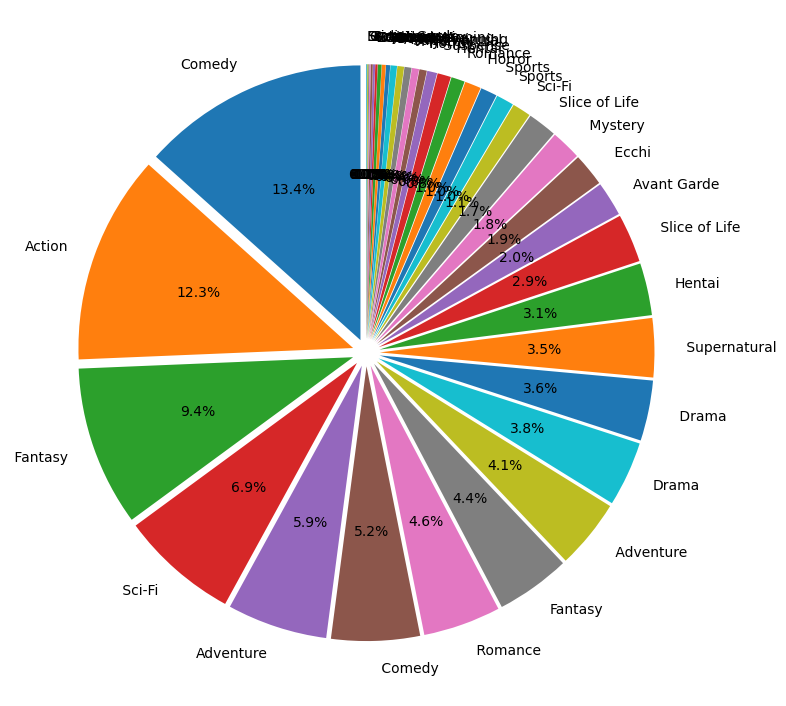

In [32]:
plt.figure(figsize=(8, 8))
explode = [0.05] * len(Genres)
plt.pie(Genres.values, labels=Genres.index, autopct='%1.1f%%', startangle=90,explode=explode)
#plt.legend(Genres.index,loc='right', bbox_to_anchor=(2, 0.5),fontsize='small')
plt.tight_layout()

In [33]:
df.head()

,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [34]:
year = df['Aired'].str[-4:]

In [35]:
year.head()

0    1999
1    2001
2    1998
3    2002
4    2005
Name: Aired, dtype: object

In [36]:
idx = df.groupby(df['Aired'].str[-4:])['Popularity'].idxmax()

In [37]:
idx

Aired
1917     8952
1918    21242
1924    21243
1925    21245
1926    11675
        ...  
2023    24612
2024    23453
2025    23878
able    24883
to ?    24900
Name: Popularity, Length: 106, dtype: int64

In [38]:
by_year = df.loc[idx,['Name','Popularity']]

In [39]:
by_year['Aired'] =df.loc[idx,'Aired'].str[-4:]

In [40]:
by_year =pd.DataFrame(by_year)

In [41]:
by_year.head()

,Name,Popularity,Aired
8952,Hanawa Hekonai Kappa Matsuri,16706,1917
21242,Tarou no Banpei Senkoutei no Maki,20912,1918
21243,Shou-chan no Bouken,24323,1924
21245,Kokka wo Suku e,23914,1925
11675,Shin Kachikachi Yama,18997,1926


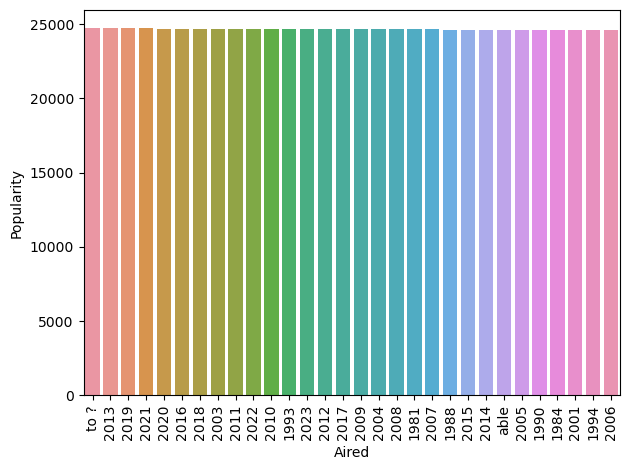

In [42]:
sns.barplot(x='Aired',y='Popularity',data=by_year.sort_values(by='Popularity',ascending=False).head(30))
plt.xticks(rotation=90)
plt.tight_layout()

In [43]:
by_year.sort_values(by='Popularity',ascending=False)['Name'].head(30)

24900                                  Wu Nao Monu
24125                                  Caterpillar
24747                          Ju Ko Kishin Baryon
24668                                       Viking
24655                          Namida Time Capsule
24126                                   Affordance
24742                         Omoide wo Hakobu Uta
24818                                 Icon's Story
24652                                    Reception
24642                               She's a Teaser
24798                                     Ying Shi
24741                         Coyote no Kubikazari
24612                                        Ducky
24285                                   Ugoku Ehon
24712                 Kimi ga Ikite Nakute Yokatta
24128                                  Love Letter
24816                           Fushigi na Chikara
24000                      Tamagotchi! Special DVD
23966                           Moonstruck Artemis
24756                          

In [44]:
by_year.count()

Name          106
Popularity    106
Aired         106
dtype: int64

In [45]:
df.groupby(df['Aired'].str[-4:])['Popularity'].idxmax()

Aired
1917     8952
1918    21242
1924    21243
1925    21245
1926    11675
        ...  
2023    24612
2024    23453
2025    23878
able    24883
to ?    24900
Name: Popularity, Length: 106, dtype: int64

In [46]:
by_year

,Name,Popularity,Aired
8952,Hanawa Hekonai Kappa Matsuri,16706,1917
21242,Tarou no Banpei Senkoutei no Maki,20912,1918
21243,Shou-chan no Bouken,24323,1924
21245,Kokka wo Suku e,23914,1925
11675,Shin Kachikachi Yama,18997,1926
...,...,...,...
24612,Ducky,24678,2023
23453,i☆Ris the Movie: Full Energy!!,19215,2024
23878,Future Kid Takara,17126,2025
24883,Hana-Doll*: Reinterpretation of Flowering,24637,able


In [47]:
df.head()

,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...


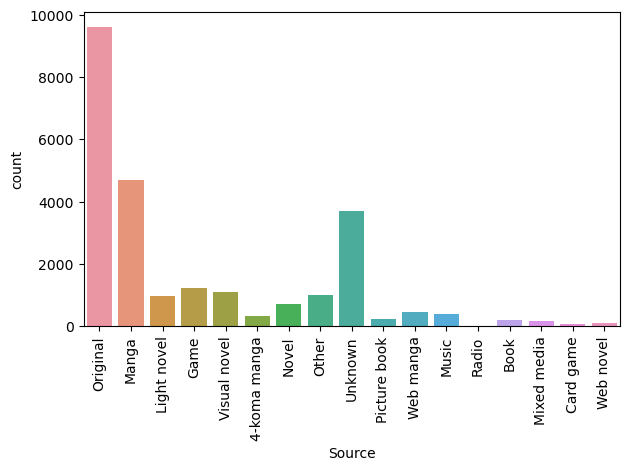

In [48]:
sns.countplot(x=df['Source'])
plt.xticks(rotation=90)
plt.tight_layout()

In [49]:
sorted = df['Source'].value_counts().sort_values(ascending=False)

In [50]:
sorted

Source
Original        9622
Manga           4687
Unknown         3689
Game            1232
Visual novel    1107
Other           1008
Light novel      968
Novel            709
Web manga        447
Music            395
4-koma manga     314
Picture book     210
Book             191
Mixed media      162
Web novel         82
Card game         68
Radio             14
Name: count, dtype: int64

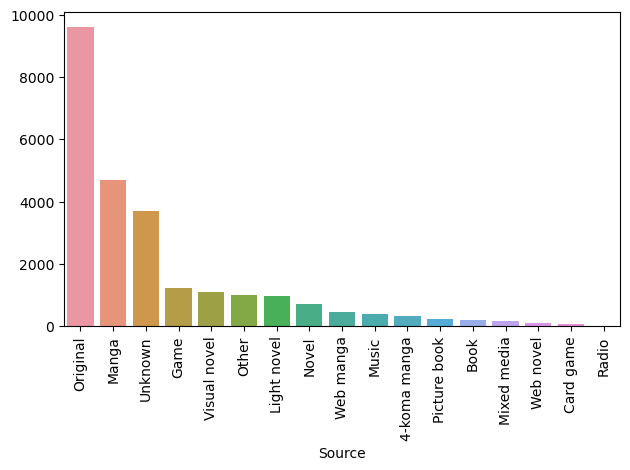

In [51]:
sns.barplot(x=sorted.index,y=sorted.values)
plt.xticks(rotation=90)
plt.tight_layout()

In [56]:
text = ' '.join(df[df['Genres']!="UNKNOWN"]['Genres'])

In [59]:
text

'Action, Award Winning, Sci-Fi Action, Sci-Fi Action, Adventure, Sci-Fi Action, Drama, Mystery, Supernatural Adventure, Fantasy, Supernatural Sports Comedy, Drama, Romance Comedy, Slice of Life, Sports Action, Drama Drama, Mystery, Suspense Action, Adventure, Fantasy Action, Adventure, Fantasy Sports Action, Sports Comedy, Romance Action, Adventure, Comedy, Sci-Fi, Ecchi Action, Drama, Sci-Fi Action, Supernatural Comedy, Gourmet Action, Drama, Sci-Fi Action, Avant Garde, Award Winning, Drama, Sci-Fi, Suspense Drama, Sci-Fi Avant Garde, Drama, Sci-Fi Action, Adventure, Drama, Fantasy, Horror Action, Award Winning, Mystery, Sci-Fi, Suspense Action, Drama, Romance Action, Adventure, Comedy, Romance Drama Action, Adventure, Horror, Sci-Fi, Supernatural Adventure, Fantasy, Mystery Comedy, Romance, Supernatural Comedy, Romance, Supernatural Action, Drama, Romance, Supernatural Award Winning, Comedy, Drama, Sci-Fi, Sports Comedy, Drama, Romance Action, Drama, Sci-Fi Action, Adventure, Fantasy

In [83]:
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(text)

In [84]:
wordcloud_img = wordcloud.to_image()

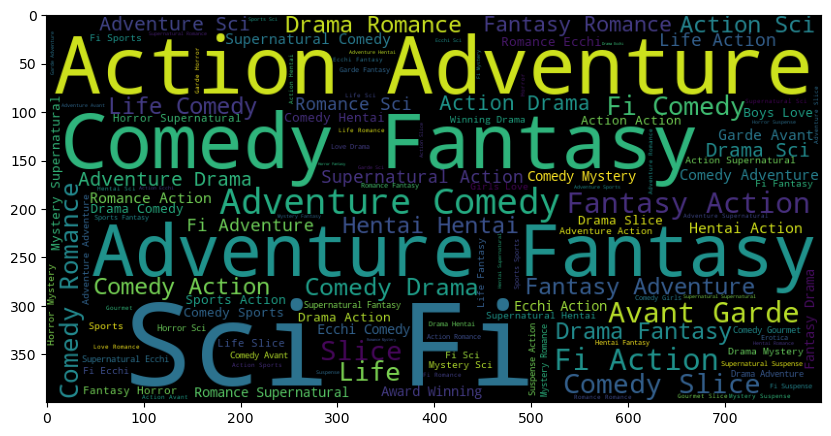

In [85]:
plt.figure(figsize=(10,10))

plt.imshow(wordcloud_img)

In [87]:
df.head()

,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [142]:
popu = df.sort_values(by='Popularity',ascending=False).head(200)
animes = text = ''.join(popu['Name'].head(100))

In [143]:
animes

"Wu Nao MonuCaterpillarJu Ko Kishin BaryonVikingNamida Time CapsuleThe Grown DinosaurKarma (Music)CultAffordanceAnthraciteEien HanahadashiiKagirinaku Haiiro eAnemone (Music)Sensei no IutooriCocoonSeishun no Hikari to KageSoreyuke! Gakkyuu IinchouOmoide wo Hakobu UtaAnaphylaxisIcon's StoryClover GameHaruzora to AkizoraZeroRed ClubReceptionShe's a TeaserPurple HypeSun Xingzhe ChuanFight ClubTouittenYing ShiCoyote no KubikazariError SuiseiDuckyUgoku EhonDorothyKimi ga Ikite Nakute YokattaNazukeau TabijiRakugakisamaOn Time Off TimeJianzhen da HeshangLusi HeThe IDOLM@STER Cinderella Girls: Starlight Stage CMsLove LetterWo Shi Zhi Xiao Xiaoniao (2013)MusicMove OnCriticismFushigi na ChikaraKokoroDaoyingTamagotchi! Special DVDBingxue Zhi YueFollow Your FantasyWang Shen Zhi YeYou're So Lonely Now, so You Need Me Back by Your Side AgainHui Jia LushangWuxiaMoonstruck ArtemisGag Short AnimationMukidona Sen-tachi100 Manten☆Pax SalomenaBan Shen Zhi JingTou Tiao Dou Shi TaA Drawing for MomGin KkumYam

In [147]:
wordcloud2 = WordCloud(width=800,height=400,background_color='White').generate(animes)

In [148]:
wordcloud_img_name = wordcloud2.to_image()

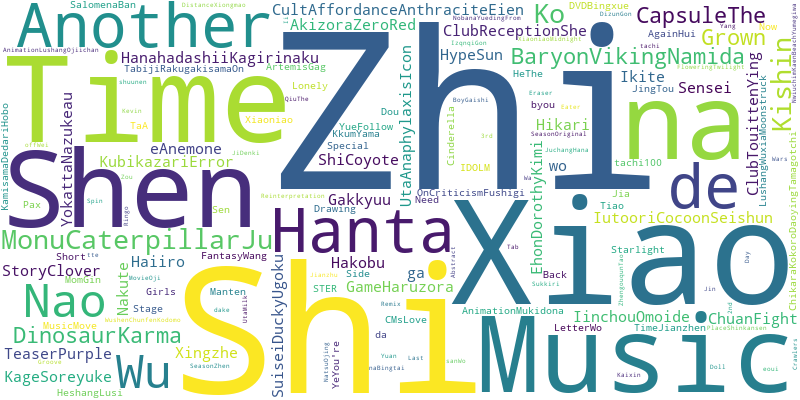

In [149]:
wordcloud_img_name